In [13]:
import pandas as pd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [136]:
wsb = pd.read_pickle('../wsb_data.pkl')



In [137]:
wsb

,title,self,text,author,name,id,upvote_ratio,ups,downs,awarders,awards,total_awards,url,comments,time_created
0,Nio day🚀🚀,False,,Evdrmr,t3_kom7tp,kom7tp,0.69,11,None,[],[],0,https://i.redd.it/ytvyk6p47t861.jpg,NaN,NaN
1,Stop making “meta” posts about awards. You ain...,True,[removed],None,t3_kom59t,kom59t,1.00,1,None,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN
2,Did I do something wrong (r/stocks),False,,nathantheman,t3_kom3zp,kom3zp,1.00,1,None,[],[],0,https://i.redd.it/if5ewo146t861.jpg,NaN,NaN
3,Fuck r/stocks all my homies hate r/stocks,True,[removed],Danne080,t3_kom3oq,kom3oq,0.71,11,None,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...,NaN,NaN
4,$ACAM 🚀🚀🚀🚀 Go big or go home - I’ll be posting...,False,[deleted],None,t3_kom1z8,kom1z8,1.00,1,None,[],[],0,https://i.redd.it/bigbcmck5t861.jpg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980,Loss porn: started with 3 shares @ $234 and ha...,False,,HotStove75,t3_lglbyu,NaN,1.00,1,None,[],[],0,https://i.redd.it/9vfb4ecgpkg61.jpg,[],1.612929e+09
10981,Neo-Economics from GME frenzy,True,[removed],AntiBullyMighty,t3_lglbt1,NaN,1.00,1,None,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...,[],1.612929e+09
10982,What's up with NLS,True,[removed],DanielOldieLox,t3_lglbr3,NaN,1.00,1,None,[],[],0,https://www.reddit.com/r/wallstreetbets/commen...,[],1.612929e+09
10983,🙌🏼 💎,False,,winvest_investments,t3_lglbqx,NaN,1.00,1,None,[],[],0,https://i.redd.it/ntyp24wbpkg61.jpg,[],1.612929e+09


In [139]:
regex = re.compile('[^a-zA-Z ]')

for col in ['title', 'author', 'text']:
    wsb[col] = wsb[col].apply(lambda x : regex.sub('', str(x) ))

In [155]:
wsb_text = wsb[(wsb["self"] == True) & ( wsb.ups >= 200)]


In [156]:


#corpus = list( wsb_text["title"])

corpus = list(wsb["author"])
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

<AxesSubplot:xlabel='predicted', ylabel='true'>

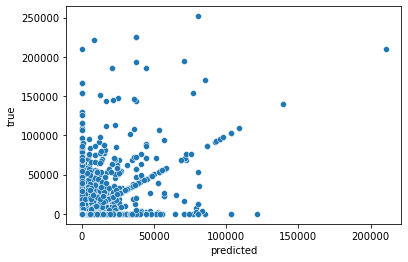

In [157]:
def sigmoid(x):
    return 1/ ( 1 + np.exp(-x))

def logit(x):
    if x != 0:
        return x/(1 - x)
    else:
        return -999999999 # ...

# y = list(map ( lambda x : sigmoid(x)  , wsb.upvote_ratio))
y = wsb.ups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)


clf = LinearRegression().fit(X_train, y_train)

results = pd.DataFrame()

results["predicted"] = clf.predict(X_test)
results["true"] = list(y_test)
sns.scatterplot(data = results, x = "predicted", y = "true")


<AxesSubplot:xlabel='predicted', ylabel='true'>

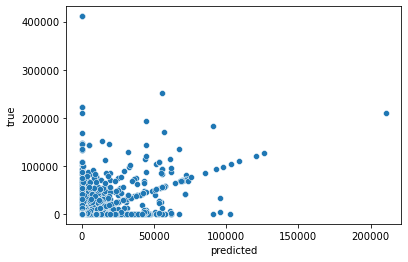

In [150]:
clf.predict(X_test)
y_test

36941    7
38176    1
16550    1
20341    1
99534    1
        ..
38007    1
89018    1
33071    1
67360    1
15648    1
Name: ups, Length: 482981, dtype: int64

In [39]:
#

In [87]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())

In [86]:

#print(vectorizer2.get_feature_names())

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearRegression()),
])

In [113]:
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

def sigmoid(x):
    return 1/ ( 1 + np.exp(-x))

y = list(map ( lambda x : sigmoid(x)  , wsb_text.upvote_ratio))
X_train, X_test, y_train, y_test = train_test_split(X2.toarray(), y, test_size=0.33, random_state=42)


clf = LinearRegression(positive=True).fit(X_train, y_train)


<AxesSubplot:xlabel='predicted', ylabel='true'>

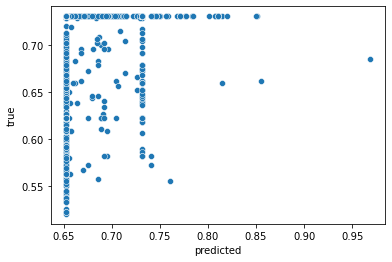

In [116]:

results = pd.DataFrame()
results["predicted"] = clf.predict(X_test)
results["true"] = y_test
sns.scatterplot(data = results, x = "predicted", y = "true")


In [106]:
wsb_text.score.describe()

count     4992.000000
mean        18.896635
std        323.637532
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      19066.000000
Name: score, dtype: float64